In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.append('../../')
os.chdir('../../')

import polars as pl
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches
plt.style.use('ggplot')

import numpy as np
from src.utils import utils


url_data = "./data"

In [11]:
%reload_ext autoreload

In [2]:
speed_high = 15
speed_low = 2
speed_moderate_down = 6
speed_moderate_up = 8
utils.set_speed(speed_high,speed_low,speed_moderate_down,speed_moderate_up)

print(utils.speed_high)
print(utils.speed_low)
print(utils.speed_moderate_up)
print(utils.speed_moderate_down)

utils.get_speeds()

15
2
8
6
15
2
8
6


In [6]:
list_dir = os.listdir(os.path.join(url_data,"original"))

pressurebases = []
surfacebased = []
for element in list_dir:
    if "pressurebased" in element:
        pressurebases.append(element)
    else:
        surfacebased.append(element)

Extreme event
 - \>= 15 m / s -> viento extremo
 - <= 2 m / s -> minimo
 - Moderado between  6 m / s <= ws <= 8 m / s

## Presure Based

### Explore data

In [6]:
df = pl.read_csv(os.path.join(url_data,pressurebases[0]), sep='\t')

In [ ]:
df = df.with_column(pl.col('time').str.strptime(pl.Datetime, fmt='%Y-%m-%d %H:%M:%S'))

In [8]:
df

level,time,index,d,cc,z,o3,pv,r,ciwc,clwc,t,u,v,w,vo,height_above_ground,dew_point,longitude,latitude
i64,datetime[μs],i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
900,2000-01-01 00:00:00,0,0.000029,0.008823,10209.253614,6.2650e-8,9.5323e-9,76.11231,2.0934e-7,0.000003,268.514793,0.720618,-3.801077,0.123059,-0.000049,1041.224331,-8.200879,17.030303,47.821774
900,2000-01-01 00:00:00,1,0.000029,0.008659,10209.105277,6.2653e-8,9.4120e-9,76.117902,2.0843e-7,0.000003,268.511278,0.722578,-3.801166,0.125313,-0.000049,1041.209201,-8.203336,17.036094,47.823349
900,2000-01-01 00:00:00,2,0.000029,0.008722,10209.395913,6.2647e-8,8.9317e-9,76.092444,2.0901e-7,0.000003,268.514985,0.704977,-3.816476,0.124562,-0.00005,1041.238848,-8.204065,17.027493,47.816376
900,2000-01-01 00:00:00,3,0.000029,0.008574,10209.258314,6.2650e-8,8.8326e-9,76.100399,2.0826e-7,0.000003,268.511501,0.707157,-3.81673,0.126671,-0.00005,1041.224813,-8.206092,17.032788,47.817864
900,2000-01-01 00:00:00,4,0.000029,0.008406,10209.107553,6.2653e-8,8.7097e-9,76.10753,2.0738e-7,0.000003,268.507765,0.709208,-3.81709,0.129013,-0.00005,1041.209435,-8.208503,17.038659,47.819438
900,2000-01-01 00:00:00,5,0.000029,0.008665,10208.860594,6.2657e-8,9.9739e-9,76.134365,2.0794e-7,0.000003,268.509764,0.740027,-3.783437,0.124876,-0.000049,1041.18424,-8.202007,17.042825,47.830207
900,2000-01-01 00:00:00,6,0.000029,0.008542,10208.946241,6.2656e-8,9.4449e-9,76.12456,2.0764e-7,0.000003,268.50852,0.727663,-3.797301,0.126817,-0.000049,1041.192978,-8.204878,17.041712,47.825959
900,2000-01-01 00:00:00,7,0.000029,0.008245,10208.741265,6.2660e-8,9.0820e-9,76.125171,2.0595e-7,0.000003,268.503139,0.726441,-3.801125,0.130838,-0.000049,1041.172071,-8.209988,17.050504,47.827119
900,2000-01-01 00:00:00,8,0.000029,0.008328,10208.931665,6.2656e-8,8.8873e-9,76.117754,2.0675e-7,0.000003,268.505341,0.717546,-3.809762,0.129953,-0.000049,1041.191494,-8.209116,17.044331,47.823091


In [6]:
df0 = df.filter(pl.col("index") == 0)
df0

level,time,index,d,cc,z,o3,pv,r,ciwc,clwc,t,u,v,w,vo,height_above_ground,dew_point,longitude,latitude
i64,str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
900,"""2000-01-01 00:...",0,0.000029,0.008823,10209.253614,6.2650e-8,9.5323e-9,76.11231,2.0934e-7,0.000003,268.514793,0.720618,-3.801077,0.123059,-0.000049,1041.224331,-8.200879,17.030303,47.821774
900,"""2000-01-01 01:...",0,0.000026,0.018091,10245.219104,6.2655e-8,1.4794e-8,76.978805,2.6060e-7,0.000006,268.404214,1.014288,-3.874048,0.060135,-0.000063,1044.893033,-8.162963,17.030303,47.821774
900,"""2000-01-01 02:...",0,0.000018,0.032058,10257.93979,6.2711e-8,1.9665e-8,79.291066,6.9104e-7,0.000008,268.314374,1.366318,-4.065946,0.073431,-0.000058,1046.190557,-7.869272,17.030303,47.821774
900,"""2000-01-01 03:...",0,0.000014,0.060712,10260.870269,6.2778e-8,2.6789e-8,82.025116,0.000002,0.000009,268.183115,1.584904,-4.189516,0.100455,-0.000049,1046.489541,-7.559413,17.030303,47.821774
900,"""2000-01-01 04:...",0,0.000012,0.107777,10257.196003,6.2869e-8,4.3617e-8,84.670765,0.000003,0.000004,268.090778,1.836131,-4.36553,0.134654,-0.000037,1046.114705,-7.238385,17.030303,47.821774
900,"""2000-01-01 05:...",0,0.000017,0.156893,10267.596085,6.2969e-8,6.8539e-8,86.848719,0.000002,9.7030e-8,268.02495,2.349336,-5.131705,0.183173,-0.00003,1047.175584,-6.973083,17.030303,47.821774
900,"""2000-01-01 06:...",0,0.000028,0.00321,10280.968305,6.3052e-8,1.3570e-7,88.098845,1.6762e-8,1.4262e-8,268.008336,2.31849,-5.800032,0.219439,-0.000034,1048.539609,-6.803434,17.030303,47.821774
900,"""2000-01-01 07:...",0,0.00003,0.05357,10293.728213,6.3088e-8,1.8390e-7,89.120412,1.0325e-7,3.5666e-8,267.982378,1.934716,-5.971163,0.125165,-0.00005,1049.841197,-6.67903,17.030303,47.821774
900,"""2000-01-01 08:...",0,0.000026,0.093246,10316.942641,6.3135e-8,1.6581e-7,91.10905,3.1449e-7,1.4262e-8,267.878055,1.858834,-5.717122,0.01661,-0.000067,1052.209174,-6.494337,17.030303,47.821774


In [7]:
df0.select(["t"])

t
f64
268.514793
268.404214
268.314374
268.183115
268.090778
268.02495
268.008336
267.982378
267.878055


In [8]:
df0.select(["level"]).unique()

level
i64
900
925
950
975
1000


In [9]:
df0.filter(pl.col("level") == 900)

level,time,index,d,cc,z,o3,pv,r,ciwc,clwc,t,u,v,w,vo,height_above_ground,dew_point,longitude,latitude
i64,str,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
900,"""2000-01-01 00:...",0,0.000029,0.008823,10209.253614,6.2650e-8,9.5323e-9,76.11231,2.0934e-7,0.000003,268.514793,0.720618,-3.801077,0.123059,-0.000049,1041.224331,-8.200879,17.030303,47.821774
900,"""2000-01-01 01:...",0,0.000026,0.018091,10245.219104,6.2655e-8,1.4794e-8,76.978805,2.6060e-7,0.000006,268.404214,1.014288,-3.874048,0.060135,-0.000063,1044.893033,-8.162963,17.030303,47.821774
900,"""2000-01-01 02:...",0,0.000018,0.032058,10257.93979,6.2711e-8,1.9665e-8,79.291066,6.9104e-7,0.000008,268.314374,1.366318,-4.065946,0.073431,-0.000058,1046.190557,-7.869272,17.030303,47.821774
900,"""2000-01-01 03:...",0,0.000014,0.060712,10260.870269,6.2778e-8,2.6789e-8,82.025116,0.000002,0.000009,268.183115,1.584904,-4.189516,0.100455,-0.000049,1046.489541,-7.559413,17.030303,47.821774
900,"""2000-01-01 04:...",0,0.000012,0.107777,10257.196003,6.2869e-8,4.3617e-8,84.670765,0.000003,0.000004,268.090778,1.836131,-4.36553,0.134654,-0.000037,1046.114705,-7.238385,17.030303,47.821774
900,"""2000-01-01 05:...",0,0.000017,0.156893,10267.596085,6.2969e-8,6.8539e-8,86.848719,0.000002,9.7030e-8,268.02495,2.349336,-5.131705,0.183173,-0.00003,1047.175584,-6.973083,17.030303,47.821774
900,"""2000-01-01 06:...",0,0.000028,0.00321,10280.968305,6.3052e-8,1.3570e-7,88.098845,1.6762e-8,1.4262e-8,268.008336,2.31849,-5.800032,0.219439,-0.000034,1048.539609,-6.803434,17.030303,47.821774
900,"""2000-01-01 07:...",0,0.00003,0.05357,10293.728213,6.3088e-8,1.8390e-7,89.120412,1.0325e-7,3.5666e-8,267.982378,1.934716,-5.971163,0.125165,-0.00005,1049.841197,-6.67903,17.030303,47.821774
900,"""2000-01-01 08:...",0,0.000026,0.093246,10316.942641,6.3135e-8,1.6581e-7,91.10905,3.1449e-7,1.4262e-8,267.878055,1.858834,-5.717122,0.01661,-0.000067,1052.209174,-6.494337,17.030303,47.821774


In [10]:
df0.filter(pl.col("level") == 900).select(['height_above_ground'])

height_above_ground
f64
1041.224331
1044.893033
1046.190557
1046.489541
1046.114705
1047.175584
1048.539609
1049.841197
1052.209174


### Variables

- level -> Presure [900,925,950,975,1000]
- time -> [datetime]
- index -> index of the windmill [Constant]
- d -> Divergence: horizontal divergence of velocity [s-1]
- cc -> Cloud cover [0-1]
- z ->  Geopotential [m2*s2]
- o3 -> Ozone mixing ratio: mass of ozone per kilogram of air [Kg*kg-1]
- pv -> Potential vorticity: capacity for air to rotate in the atmosphere [K*m2*kg-1*s-1]
- r ->  Relative humidity: water vapour pressure as a percentage of the value at which the air becomes saturated [%]
- ciwc -> Cloud ice water content, mass of cloud ice particles per kilogram of the total mass of moist air [Kg*kg-1]
- clwc -> Cloud liquid water content, the mass of cloud liquid water droplets per kilogram of the total mass of moist air [Kg*kg-1]
- t -> Temperature [K]
- u -> wind speed in the east-west, positve east, negative west, the horizontal speed of air moving towards [m*s-1]
- v -> wind speed in the north-south, positive north, negative south, the horizontal speed of air moving towards the north [m*s-1] 
- w -> vertical velocity, This parameter is the speed of air motion in the upward or downward direction [Pa*s-1]
- vo -> vorticity: This parameter is a measure of the rotation of air in the horizontal, around a vertical axis, relative to a fixed point on the surface of the Earth. [s-1]
- height_above_ground -> height above ground [m]?
- longitude -> long
- latitude -> lat

I dont know

- dew_point -> temperature at which air must be cooled in order for dew to form (Rocio) [K] ?


Find 

- Cape is not included but can be easily downloaded from the Copernicus
ERA5 web page (single level fields)

Rango de 4 dias es igual a 96 rows



Why the height above ground with the level 900 change during the year ?

## Surface Based

### Explore data

In [11]:
df_s = pl.read_csv(os.path.join(url_data,surfacebased[7]),sep='\t')

In [12]:
df_s

index,time,z,sp,msl,blh,u10,v10,t2m,d2m,u100,v100,fsr,lsm,slor,sdor,height_above_ground,relative_humidity,t100m,t135m,wspeed100m,wdir100m,wspeed135m,density_135m,longitude,latitude
i64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0,"""2002-01-01 00:...",1207.354874,101327.251598,102918.460682,1060.891889,2.634951,-5.75124,269.526132,265.35731,4.229441,-9.533872,0.364185,0.934185,0.006554,33.035138,123.118322,0.728215,268.565744,268.222726,10.431096,336.073135,10.888024,1.318042,17.030303,47.821774
0,"""2002-01-01 01:...",1207.354874,101439.732639,103035.022688,1056.651451,2.986627,-5.897566,269.287157,264.71647,4.77442,-9.760303,0.364192,0.934185,0.006554,33.035138,123.118322,0.705376,268.326769,267.983752,10.866427,333.932639,11.342425,1.320676,17.030303,47.821774
0,"""2002-01-01 02:...",1207.354874,101552.828696,103153.285356,1030.801687,3.198825,-5.788749,268.682888,263.891466,5.12814,-9.543632,0.364205,0.934185,0.006554,33.035138,123.118322,0.692071,267.722499,267.379482,10.835131,331.747257,11.309758,1.325129,17.030303,47.821774
0,"""2002-01-01 03:...",1207.354874,101606.129458,103209.43117,947.087723,3.152393,-5.202866,268.369807,263.408572,5.197961,-8.702329,0.364216,0.934185,0.006554,33.035138,123.118322,0.682251,267.409419,267.066401,10.138152,329.146515,10.582248,1.327375,17.030303,47.821774
0,"""2002-01-01 04:...",1207.354874,101654.6675,103259.964304,842.688092,3.071416,-4.624381,268.249177,263.402391,5.251583,-7.855323,0.364225,0.934185,0.006554,33.035138,123.118322,0.688175,267.288788,266.945771,9.451308,326.233112,9.865317,1.328607,17.030303,47.821774
0,"""2002-01-01 05:...",1207.354874,101692.583911,103299.181308,706.779352,2.739774,-3.896699,267.923596,263.148971,5.002219,-6.842517,0.364225,0.934185,0.006554,33.035138,123.118322,0.691398,266.963207,266.62019,8.478934,323.830947,8.850349,1.330722,17.030303,47.821774
0,"""2002-01-01 06:...",1207.354874,101729.178691,103334.988092,608.55562,2.352177,-3.101857,267.705801,263.017108,4.783497,-5.821932,0.364225,0.934185,0.006554,33.035138,123.118322,0.69562,266.745412,266.402395,7.538787,320.604752,7.869019,1.332287,17.030303,47.821774
0,"""2002-01-01 07:...",1207.354874,101767.710324,103371.559543,516.297641,2.058151,-2.436683,267.893228,263.297724,4.570956,-4.939239,0.364219,0.934185,0.006554,33.035138,123.118322,0.701147,266.93284,266.589823,6.73429,317.251696,7.029282,1.331856,17.030303,47.821774
0,"""2002-01-01 08:...",1207.354874,101803.268863,103404.193243,632.525274,2.125763,-2.049352,269.55698,264.4313,4.694949,-4.074091,0.3642,0.934185,0.006554,33.035138,123.118322,0.676128,268.596592,268.253574,6.220437,311.022989,6.49292,1.324066,17.030303,47.821774


In [13]:
df0_s = df_s.filter(pl.col("index") == 0)
df0_s

index,time,z,sp,msl,blh,u10,v10,t2m,d2m,u100,v100,fsr,lsm,slor,sdor,height_above_ground,relative_humidity,t100m,t135m,wspeed100m,wdir100m,wspeed135m,density_135m,longitude,latitude
i64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0,"""2002-01-01 00:...",1207.354874,101327.251598,102918.460682,1060.891889,2.634951,-5.75124,269.526132,265.35731,4.229441,-9.533872,0.364185,0.934185,0.006554,33.035138,123.118322,0.728215,268.565744,268.222726,10.431096,336.073135,10.888024,1.318042,17.030303,47.821774
0,"""2002-01-01 01:...",1207.354874,101439.732639,103035.022688,1056.651451,2.986627,-5.897566,269.287157,264.71647,4.77442,-9.760303,0.364192,0.934185,0.006554,33.035138,123.118322,0.705376,268.326769,267.983752,10.866427,333.932639,11.342425,1.320676,17.030303,47.821774
0,"""2002-01-01 02:...",1207.354874,101552.828696,103153.285356,1030.801687,3.198825,-5.788749,268.682888,263.891466,5.12814,-9.543632,0.364205,0.934185,0.006554,33.035138,123.118322,0.692071,267.722499,267.379482,10.835131,331.747257,11.309758,1.325129,17.030303,47.821774
0,"""2002-01-01 03:...",1207.354874,101606.129458,103209.43117,947.087723,3.152393,-5.202866,268.369807,263.408572,5.197961,-8.702329,0.364216,0.934185,0.006554,33.035138,123.118322,0.682251,267.409419,267.066401,10.138152,329.146515,10.582248,1.327375,17.030303,47.821774
0,"""2002-01-01 04:...",1207.354874,101654.6675,103259.964304,842.688092,3.071416,-4.624381,268.249177,263.402391,5.251583,-7.855323,0.364225,0.934185,0.006554,33.035138,123.118322,0.688175,267.288788,266.945771,9.451308,326.233112,9.865317,1.328607,17.030303,47.821774
0,"""2002-01-01 05:...",1207.354874,101692.583911,103299.181308,706.779352,2.739774,-3.896699,267.923596,263.148971,5.002219,-6.842517,0.364225,0.934185,0.006554,33.035138,123.118322,0.691398,266.963207,266.62019,8.478934,323.830947,8.850349,1.330722,17.030303,47.821774
0,"""2002-01-01 06:...",1207.354874,101729.178691,103334.988092,608.55562,2.352177,-3.101857,267.705801,263.017108,4.783497,-5.821932,0.364225,0.934185,0.006554,33.035138,123.118322,0.69562,266.745412,266.402395,7.538787,320.604752,7.869019,1.332287,17.030303,47.821774
0,"""2002-01-01 07:...",1207.354874,101767.710324,103371.559543,516.297641,2.058151,-2.436683,267.893228,263.297724,4.570956,-4.939239,0.364219,0.934185,0.006554,33.035138,123.118322,0.701147,266.93284,266.589823,6.73429,317.251696,7.029282,1.331856,17.030303,47.821774
0,"""2002-01-01 08:...",1207.354874,101803.268863,103404.193243,632.525274,2.125763,-2.049352,269.55698,264.4313,4.694949,-4.074091,0.3642,0.934185,0.006554,33.035138,123.118322,0.676128,268.596592,268.253574,6.220437,311.022989,6.49292,1.324066,17.030303,47.821774


In [14]:
df0_s.select(["wdir100m"])

wdir100m
f64
336.073135
333.932639
331.747257
329.146515
326.233112
323.830947
320.604752
317.251696
311.022989


In [61]:
df0_datetime = df0_s.with_column(pl.col('time').str.strptime(pl.Datetime, fmt='%Y-%m-%d %H:%M:%S'))
# df0_datetime['time'] = pl.col('time').str.parse_date(format='%Y-%m-%d %H:%M:%S')

In [68]:
start_date = datetime(2007, 1, 1, 0, 0, 0)
end_date =  datetime(2007, 1, 30, 0, 0, 0)

print(df0_datetime[2000,1])
print(start_date)
print(end_date)

df0_datetime_filter = df0_datetime.filter((df0_datetime['time'] >= start_date) & (df0_datetime['time'] < end_date))

2002-03-25 08:00:00
2007-01-01 00:00:00
2007-01-30 00:00:00


In [63]:
df0_datetime_filter

index,time,z,sp,msl,blh,u10,v10,t2m,d2m,u100,v100,fsr,lsm,slor,sdor,height_above_ground,relative_humidity,t100m,t135m,wspeed100m,wdir100m,wspeed135m,density_135m,longitude,latitude
i64,datetime[μs],f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64


/home/caumel/anaconda3/lib/python3.9/site-packages/numpy/ctypeslib.py:518: RuntimeWarning: A builtin ctypes object gave a PEP3118 format string that does not match its itemsize, so a best-guess will be made of the data type. Newer versions of python may behave correctly.
  return asarray(obj)


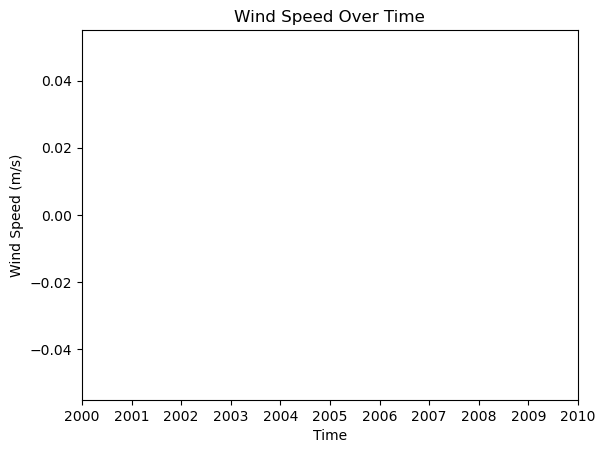

In [64]:
# # Shift the dates by 1 day forward
# subset['datetime'] += timedelta(days=1)

# Create a basic line plot of wind speed over time
plt.plot(df0_datetime_filter['time'], df0_datetime_filter['wspeed100m'])
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed Over Time')
plt.show()

### Variables

- index -> index of the windmill [Constant]
- time -> datetime [datetime]
- z -> Geopotential [m2s2]
- sp -> Surface presure [Pa]
- msl -> Mean sea level: pressure level for atmospheric measurements [Pa]
- blh -> Boundary Layer height: height at which turbulent mixing in the - atmosphere is strongest [m]
- ----
- u10 -> Wind speed east-west at 10m above the surface, u component of wind at 10m [ms-1]
- v10 -> Wind speed north-south at 10m above the surface, v component of wind at 10m [ms-1]
- t2m -> Relative humidity, temperature at 2 m [K]
- d2m -> Dew point temperature at 2 m [K]
- u100 -> Wind speed east-west at 100 meter above the surface, u component of wind [ms-1]
- v100 -> Wind speed north-south at 100 meter above the surface, v component of wind [ms-1]
- ----
- height_above_ground -> [m]
- relative_humidity -> Amount of moisture in the air relative to the amount - of moisture the air could hold at a given temperature. [%]
- ----
- t100m -> Temperature at heights of 100 m [K]
- t135m -> Temperature at heights of 135 m [K]
- ----
- wspeed100m -> Wind speed at heights of 100 meters [ms-1]
- wdir100m -> Wind direction at a height of 100 meters [Degreetrue]
- wspeed135m -> Wind speed at heights of 135 meters [ms-1]
- density_135m -> Air density at a height of 135 meters [kgm3]
- ----
- longitude -> [long]
- latitude -> [lat]
- ----
- fsr -> Forecast surface roughness: This parameter is the aerodynamic roughness length in metres. It is a measure of the surface resistance. This parameter is used to determine the air to surface transfer of momentum [m]
- lsm -> Land sea mask, this parameter is the proportion of land, as opposed to ocean or inland waters (lakes, reservoirs, rivers and coastal waters), in a grid box. [0-1]
- slor -> Slope of sub-gridscale orography: This parameter represents the slope of the sub-grid valleys, hills and mountains. A flat surface has a value of 0, and a 45 degree slope has a value of 0.5. [~]
- sdor -> Standard deviation of orography: standard deviation of the height of the sub-grid valleys, hills and mountains within a grid box. [m]

## Variables to use 

Katerina say to use this features:

- Time

Should we use this variables ? Ask Katerina
- Level -> 925
- ----

#### Surface

- blh [m]
- d2m [Cº]
- z [m2s2]
- relative_humedity [%]
- t2m [Cº]
- t100m [Cº]
- t135m [Cº]
- wdir100m [Degreetrue]
- wspeed135m [ms-1]
- wspeed100m [ms-1]
- ----

#### Presure

- cc
- o3
- pv
- ----

Should we use this variables ? Ask Katerina

- r ? Was the most important in the bachelor thesis, is the same as relative_humedaity in surface ?
- t ? This one i think that is less important because I dont know in which height and more info
- u,v,w ?


Should we use other variables like ?


## Add Cape variable

In [19]:
import cfgrib

# Center 47.84167737032574, 17.016265637931117

# Order areas 47.90 North , 47.80 South
# West 16.96, East 17.06

# https://cds.climate.copernicus.eu/cdsapp#!/yourrequests?tab=form

# Request done, waiting for the data.

# Will give me all the areas, or we take from the data or do by the page. 

# path_1 = os.path.join(os.path.join(url_data,"original"),"CAPE_1.grib")
# path_2 = os.path.join(os.path.join(url_data,"original"),"CAPE_2.grib")

# data_1 = cfgrib.open_dataset(path_1)
# data_2 = cfgrib.open_dataset(path_2)

In [20]:
# df_1 = pd.DataFrame({"time": np.array(data_1["time"]),
#                       "cape": np.array(data_1["cape"]).reshape(np.array(data_1["cape"]).shape[0])})

# df_1.to_csv(os.path.join(url_data,"CAPE_1.csv"))

# df_2 = pd.DataFrame({"time": 
#                             np.array(data_2["time"]),
#                    "cape":
#                             np.array(data_2["cape"]).reshape(np.array(data_2["cape"]).shape[0])})

# df_2.to_csv(os.path.join(url_data,"CAPE_2.csv"))

In [69]:
# cape1 = pl.read_csv(os.path.join(url_data,"CAPE_1.csv"))
# cape2 = pl.read_csv(os.path.join(url_data,"CAPE_2.csv"))

In [95]:
# cape1 = cape1.with_column(pl.col('time').str.strptime(pl.Datetime, fmt='%Y-%m-%d %H:%M:%S'))
# cape2 = cape2.with_column(pl.col('time').str.strptime(pl.Datetime, fmt='%Y-%m-%d %H:%M:%S'))

# start_date =  datetime(2000, 1, 1, 0, 0, 0)
# end_date =  datetime(2021, 1, 1, 0, 0, 0)

# cape1 = cape1.filter((cape1['time'] >= start_date) & (cape1['time'] < end_date))
# cape2 = cape2.filter((cape2['time'] >= start_date) & (cape2['time'] < end_date))

# cape = pl.concat([cape2, cape1])
# cape = cape.drop("")

# cape

In [100]:
# cape.write_csv(os.path.join(url_data,"CAPE.csv", datetime_format='%Y-%m-%d %H:%M:%S'))

## Join data

It would be good to find out, if you take the three scenarios (low extreme wind speed, high  extreme wind speed, moderat ewind speed) how many hours of the wind speed you can take so that you have at least of 20 % of that time speed among the time series? I mean if you have only 96 hours long time series for low extreme wind speed, 20% of 96  should be above the speed limit.
Can you find even longer time series of wind speed so that they have 20%  extremal values (and similarly for th eother two scenaria)?
Check, if IKM clustering algoritm requires "long" time series or  not.

### Per year

In [5]:
year = "2000"
pressure_columns = ["level","time","index","cc","o3","pv"]
surface_columns = ["index","time","blh", "d2m", "z", "relative_humidity", "t2m", "t100m", "t135m", "wdir100m", "wspeed135m", "wspeed100m"]
utils.join_files(year,url_data,pressure_columns,surface_columns)

In [5]:
years = ["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]

pressure_columns = ["level","time","index","cc","o3","pv"]
surface_columns = ["index","time","blh", "d2m", "z", "relative_humidity", "t2m", "t100m", "t135m", "wdir100m", "wspeed135m", "wspeed100m"]

for year in years:
    utils.join_files(year,url_data,pressure_columns,surface_columns)

## Split data

### Test

In [3]:
year = "2000"
df = pl.read_csv(os.path.join(url_data,"join_data",f"data_{year}.csv"))

In [4]:
datetime.strptime(df[0,1], '%Y-%m-%d %H:%M:%S') + timedelta(hours=2)

datetime.datetime(2000, 1, 1, 2, 0)

In [5]:
df_900, df_925, df_950, df_975, df_1000 = utils.prepare_data_per_presure(df)

In [6]:
df_900_1 = utils.get_data_per_windfarm(df_900,1)

<Figure size 640x480 with 0 Axes>

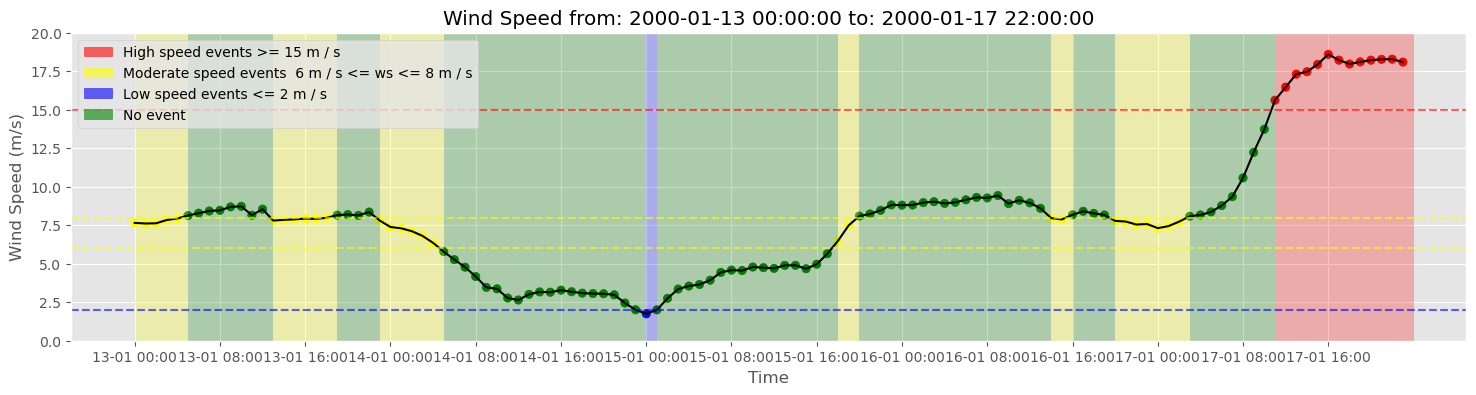

In [13]:
start_date = datetime(2000, 1, 13, 0, 0, 0)
end_date =  datetime(2000, 1, 17, 23, 0, 0)
df_datetime_filter = utils.plot_date_range(df_900_1,start_date,end_date)

Doubt about how to split data:

- Should I take as a main extreme event, in the center and take 4 days, also if the exactly close one is also extreme
- Should I take this events with one type of distance so i can indentify as a different extreme event
- Should I take the one that are split and dont have distance. [The one that I most like]

Should I study the correlation ?
Should I study in how many cases this happend ? 
Count amount of events in the three different ways.

### Experiment with High Speed

In [23]:
df_high_speed,df_low_speed,df_moderate_speed = utils.get_extreme_events(df_900_1)

df_high_speed

level,time,index,cc,o3,pv,cape,blh,d2m,z,relative_humidity,t2m,t100m,t135m,wdir100m,wspeed135m,wspeed100m
i64,datetime[μs],i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
900,2000-01-17 11:00:00,1,0.355881,5.5189e-8,3.1168e-7,0.0,1126.387806,272.914278,1210.117033,0.782322,276.338311,275.377922,275.034905,300.526959,15.617703,14.962288
900,2000-01-17 12:00:00,1,0.19198,5.3609e-8,1.7181e-7,0.0,1128.392428,273.239603,1210.117033,0.757297,277.134986,276.174597,275.83158,298.733682,16.466394,15.775364
900,2000-01-17 13:00:00,1,0.09166,5.3032e-8,1.5831e-7,0.0,1176.022572,273.078786,1210.117033,0.751,277.087742,276.127354,275.784336,300.875264,17.311304,16.584816
900,2000-01-17 14:00:00,1,0.120175,5.3188e-8,1.8669e-7,0.004904,1223.771211,273.235523,1210.117033,0.750212,277.264803,276.304415,275.961397,305.17052,17.468342,16.735264
900,2000-01-17 15:00:00,1,0.244366,5.3410e-8,1.8273e-7,0.0,1255.638516,273.486091,1210.117033,0.761736,277.306223,276.345835,276.002818,305.576005,17.946295,17.193159
900,2000-01-17 16:00:00,1,0.240785,5.3183e-8,2.0251e-7,0.0,1328.721359,273.567527,1210.117033,0.752598,277.562585,276.602197,276.259179,306.266014,18.598123,17.817632
900,2000-01-17 17:00:00,1,0.280761,5.3666e-8,1.5170e-7,0.0,1403.932481,273.718207,1210.117033,0.756918,277.636387,276.675999,276.332981,304.458771,18.221179,17.456507
900,2000-01-17 18:00:00,1,0.155849,5.4662e-8,1.3726e-7,0.020077,1530.914869,273.799568,1210.117033,0.752779,277.798825,276.838437,276.495419,305.341711,17.970301,17.216157
900,2000-01-17 19:00:00,1,0.146596,5.4748e-8,2.1348e-7,0.020077,1596.120417,273.853965,1210.117033,0.750515,277.898099,276.937711,276.594693,306.276592,18.106365,17.346512


#### Option 1: Take each extrem event as 1 event, also if they are consecutive.

In [24]:
list_high_extreme_events = utils.find_extreme_events_1(df_high_speed,df_900_1,96)

<Figure size 640x480 with 0 Axes>

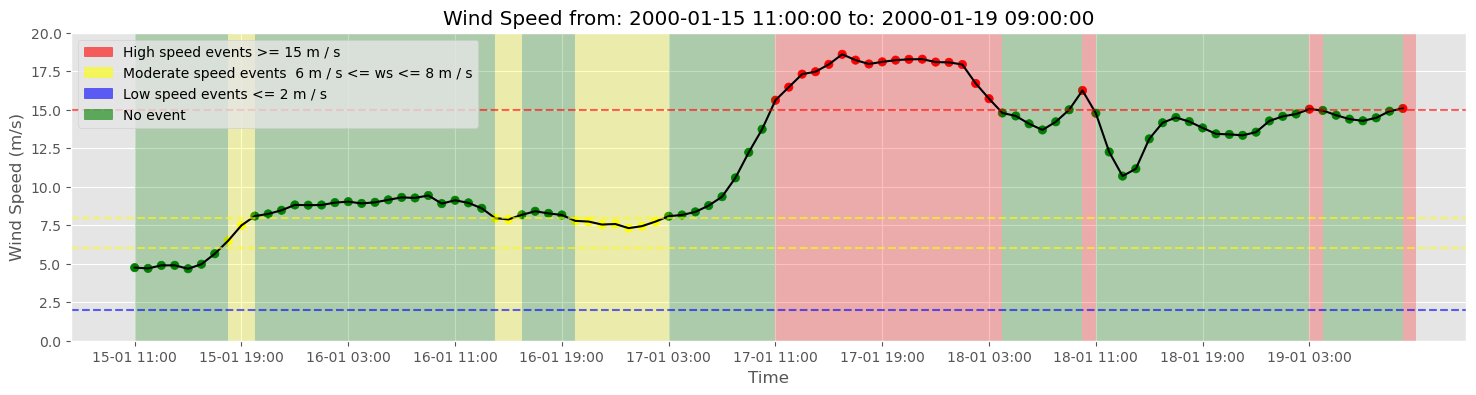

In [25]:
df_datetime_filter = utils.plot_date_range(df_900_1,list_high_extreme_events[0]['time'].min(),list_high_extreme_events[0]['time'].max())

#### Option 2: Take each event that have a distance.

In [19]:
list_high_extreme_events = utils.find_extreme_events_2(df_high_speed,df_900_1,96,3)

<Figure size 640x480 with 0 Axes>

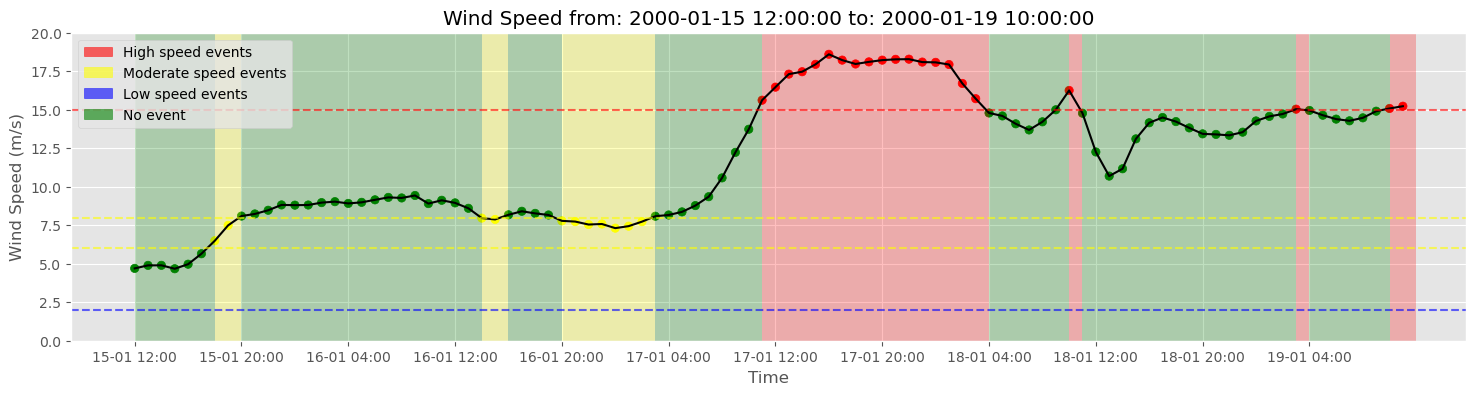

In [20]:
df_datetime_filter = utils.plot_date_range(df_900_1,list_high_extreme_events[0]['time'].min(),list_high_extreme_events[0]['time'].max())

#### Option 3: Take each event dividir and if they are consecutive consider as one

In [21]:
list_high_extreme_events = utils.find_extreme_events_3(df_high_speed,df_900_1,96)

<Figure size 640x480 with 0 Axes>

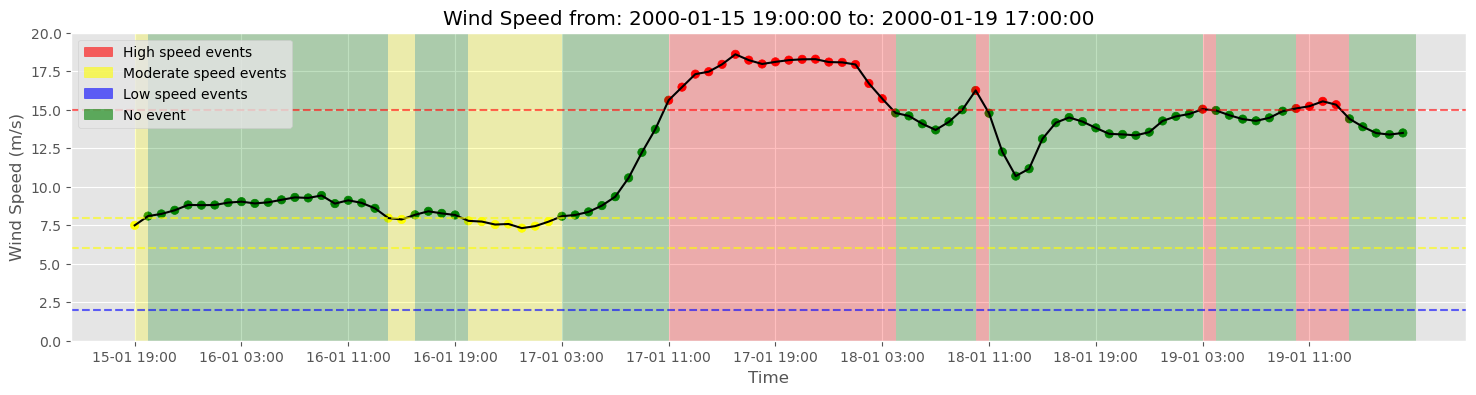

In [22]:
df_datetime_filter = utils.plot_date_range(df_900_1,list_high_extreme_events[0]['time'].min(),list_high_extreme_events[0]['time'].max())

### Split dataset

In [5]:
utils.get_speeds()

15
2
8
6


In [4]:
range_cut = 96
path_save = os.path.join(url_data,"dataset_split_events")
  
year = "2000"
df = pl.read_csv(os.path.join(url_data,f"data_{year}.csv"))
utils.get_datasets(df, range_cut, path_save, year, percentage = 0.2)

windfarm nº 0
lista de eventos 69 1019 3998
df total (6624, 18) (97824, 18) (383808, 18)


In [ ]:
# years = ["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017","2018","2019","2020"]


# range_cut = 96
# path_save = os.path.join(url_data,"dataset_split_events")

# for year in years:
#     df = pl.read_csv(os.path.join(url_data,f"data_{year}.csv"))
#     utils.get_datasets(df, range_cut, path_save, year)


In [9]:
# path = os.path.join(url_data,"dataset_split_events","2000_96_13_high.csv")
# df_13 = utils.count_event_per_file(path)

path = os.path.join(url_data,"dataset_split_events_15","2000_96_15_high_.csv")
df_15 = utils.count_event_per_file(path)

# print(df_13['events'].sum())
print(df_15['events'].sum())


3965


In [8]:
path = os.path.join(url_data,"dataset_split_events","2000_96_moderate.csv")
df_moderate = utils.count_event_per_file(path)

path = os.path.join(url_data,"dataset_split_events","2000_96_low.csv")
df_low = utils.count_event_per_file(path)

print(df_moderate['events'].sum())
print(df_low['events'].sum())

152974
38263
